In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

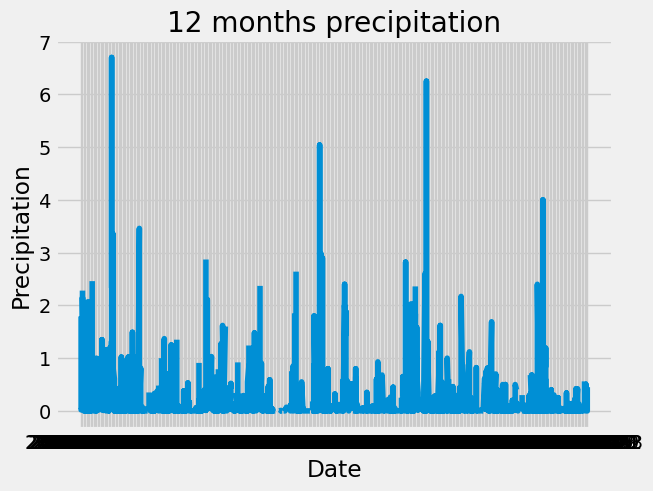

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_data = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

# Calculate the date one year from the last date in data set.
yearago = (dt.date(2017,8,23)) - (dt.timedelta(days=365))

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= yearago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_results_df = pd.DataFrame(results, columns=['date','precipitation'])
precipitation_results_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_results_df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot (precipitation_results_df)
plt.title ('12 months precipitation')
plt.xlabel ('Date')
plt.ylabel ('Precipitation')
plt.xticks 

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(measurement).group_by(measurement.station).count()
print(stations)

9


In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.tobs)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.tobs).desc())

most_active.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_temps = session.query(measurement.station, measurement.tobs).filter(measurement.station == 'USC00519281')
most_active_temps.all()

[('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 74.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 76.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 70.0),
 ('USC00519281', 75.0),
 ('USC00519281', 64.0),
 ('USC00519281', 60.0),
 ('USC00519281', 61.0),
 ('USC00519281', 68.0),
 ('USC00519281', 64.0),
 ('USC00519281', 66.0),
 ('USC00519281', 67.0),
 ('USC00519281', 70.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 69.0),
 ('USC00519281', 60.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 65.0),
 ('USC00519281', 75.0),
 ('USC00519281', 69.0),
 ('USC00519281', 67.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 72.0),
 ('USC00519281', 67.0),
 ('USC00519281', 65.0),
 ('USC00519281', 64.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 68.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 61.0),
 ('USC00519281',

Text(0.5, 4.183333333333314, 'Temperature')

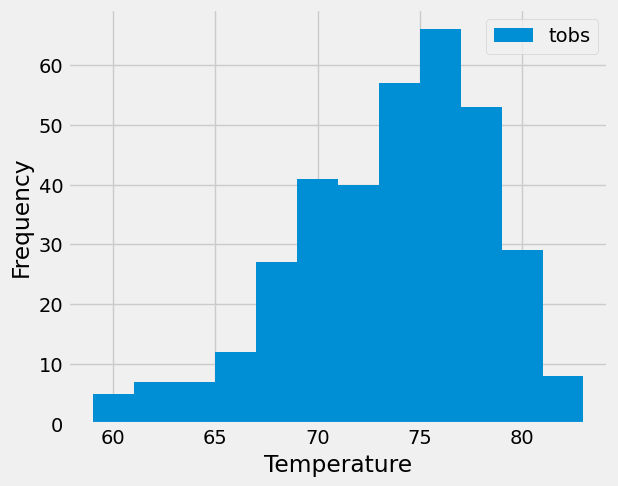

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()